In [1]:
import torch
from torchvision import datasets, models, transforms
from torchvision.utils import make_grid
from torchvision import transforms
from torch import np
import torch.optim as optim
from torch.autograd import Variable
import torch.nn as nn

In [2]:
import utils
%matplotlib inline

In [3]:
# hyperparameters
batch_size = 8

In [4]:
# TODO: consider using DenseNet instead
# https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/02-intermediate/deep_residual_network/main.py

# Image Preprocessing 
normalize = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
data_transforms = {
    'train': transforms.Compose([
        transforms.Scale(64),
        #transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ])
}

# load CIFAR10 dataset
DATA_PATH = './data/CIFAR10/'

train_dataset = datasets.CIFAR10(root=DATA_PATH,
                                 train=True, 
                                 transform=data_transforms['train'], 
                                 download=True)

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

LABEL_PATH = 'data/CIFAR10/cifar-10-batches-py/batches.meta'
label_names = utils.unpickle(LABEL_PATH)['label_names']


Files already downloaded and verified


In [10]:
# load pretrained ResNet18 model 
original_model = models.resnet18(pretrained=True)
model = utils.FeatureExtractor(original_model)

# freeze weights
for param in model.parameters():
    param.requires_grad = False


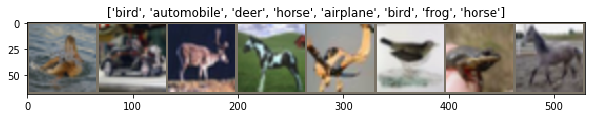

In [11]:
(images, labels) = next(iter(train_loader))
out = make_grid(images)
utils.imshow(out,figsize=(10,15),title=[label_names[x] for x in labels])

In [12]:
images = Variable(images)
labels = Variable(labels)

outputs = model(images) # batch_size x channels x width x height, 
                        # 8 x 256 x 4 x 4

In [13]:
print model

FeatureExtractor (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU (inplace)
    (3): MaxPool2d (size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1))
    (4): Sequential (
      (0): BasicBlock (
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
        (relu): ReLU (inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      )
      (1): BasicBlock (
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
        (relu): ReLU (inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p